<style>
    
    h1 {
      display: block;
      max-width: 100%;
      margin-left: auto;
      margin-right: auto;
      text-align: center;
      font-family: "Arial";
      font-size: 32px;
      line-height: 60px;
      font-style: normal;
    }
    
    h2 {
      font-family: "Arial", serif;
      font-size: 24px;
    }

    h3 {
      font-family: "Arial", serif;
      font-size: 20px;
    }

    h4 {
      text-align: center;
      font-size: 20px;
    }

    h5 {
      font-family: "Arial", serif;
      font-size: 16px;
      font-style: oblique;
    }

    div.text_cell_render {
      padding-left: 5%;
      padding-right: 5%;
      width: 90%;
      font-family: "Tahoma", serif;
      font-size: 14px;
    }
    
</style>


<!--
Potential variable values in report include: References as [[2]], Table/Figure numbers as Table 2, formulae with Latex format dollar-sign-enclosed, 
-->

<br>
<div align="center"><h1>Methods for evaluating wind and temperature patterns:</h1></div>
<div align="center"><h4>Observing patterns of eastern Pacific rim</h4></div>

<br><br>
<h5>Faraz Hossein-Babaei</h5>
<br>

<h2>Introduction</h2>

<p>Comparing wind patterns with overall pressure fields across globe from data [[1]](#References). The e-nose comprises distinct gas sensors in an array. The voltage across each $TiO_{2}$-based (ranging [0,1]) temporal profiles of responses to the edible substances were provided for anlaysis, 4 specimens from each of 4-7 brand samples for each of the 3 subtances. Principal Component Analysis (PCA). For the analysis, each specimen profile was represented as a 300-dimensional/-feature observation based on 300 points along its temporal detection profile.

<br><br>

<h2>Method</h2>

<p>The data Figure 5 along with the known sample data in 3-D plots.

<br><br>

<h2><b>Results</b></h2>

<h3><b>PCA</b></h3>

<p>In to distinguish.

<br>

<h3><b>Clustering</b></h3>

<p>All clusters &plusmn;1 as well. DBSCAN.

<br><br>

<h2><b>Conclusion</b></h2>

<p>As substances.

<br><br>

<h2>References</h2>

[[1]] [r1] F. Hossein-Babaei and A. Amini, "A breakthrough in gas diagnosis with a temperature-modulated generic metal oxide gas sensor", Sensors Actuators B, 166, pp. 419-425 (2012).
[r1]: http://www.sciencedirect.com/science/article/pii/S0925400512002341

<br>


In [1]:
""" Hide code segments from nbviewer output """
""" From http://protips.maxmasnick.com/hide-code-when-sharing-ipython-notebooks """
import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
""" Reading modules and constants """

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
#import matplotlib.gridspec
#import ipy_table
import IPython.display as dp
import warnings


%matplotlib inline
plt.style.use('ggplot')   # style for plots
# formats floats to show up with 4 dec. digits when display() used
pd.set_option('display.float_format', lambda x: '%.4f' % x)


# Constants:
STATIONS = ["SF17", "SF18"]
# list so the hash dict is read in order!? Alternate: collections.OrderedDict
CATEG_LIST = ["T [C]", "GHI", "wnd v [m/s]", "wnd dir [deg]", "var wnd dir [deg]"]
SN_PTS = ["2020-3-20", "2020-6-20", "2020-9-20", "2020-12-20"]   # dates of seasons' initial points



In [3]:
# """ Correcting source files' datetime indices writing new files """

#yrs = list(range(2008,2017))

# for stn in stns:
#     print ("Attending to " + stn)
#     dst_f_name = "res/mod/" + stn + ".csv"
#     first_cycl_bool = True
    
#     for yr in yrs:
#         print ("Year " + str(yr))
#         src_f_name = "res/data/" + str(yr) + "/" + stn + ".csv"
        
#         try:
#             df = pd.read_csv(src_f_name, sep=',', header=0, usecols=[4,5,6,7,8,9], \
#                              names=["time end", "wnd v [m/s]", "var wnd dir [deg]", \
#                                     "wnd dir [deg]", "T [C]", "GHI"])
#         except:   # TODO: Thyself, please be more specific with the Exception, and print its type too
#             print (src_f_name + "  not quite there.")
#             continue
        
#         q_msk = ['?' in date for date in df["time end"]]
#         df["time end"][q_msk] = [ datestr.replace('?','') for datestr in df["time end"][q_msk] ]
#         df["time end"] = pd.to_datetime(df["time end"])
        
#         if True in q_msk:   # If there has been any '?' in source file dates (requiring correction)
#             this_day = 1
#             last_cycl_hr = 0
#             last_cycl_mn = 1
#             for idx, row in df.iterrows():
#                 this_time = row["time end"]
#                 if df.loc[idx,"time end"].hour < last_cycl_hr:
#                     this_day += 1
#                 if this_time.month != last_cycl_mn:
#                     this_day = 1
#                     #print (idx, this_day, " m:",this_time.month, " h:",this_time.hour)
#                 df.loc[idx,"time end"] = df.loc[idx,"time end"].replace(day=this_day)   # Changing df here
#                 last_cycl_hr = this_time.hour
#                 last_cycl_mn = this_time.month
        
#         df.set_index ( pd.to_datetime(df["time end"]), inplace=True )
#         df.drop ("time end", axis=1, inplace=True)
#         #df.index.name = None
#         #df.sort_index (ascending=True, inplace=True)
        
#         #dp.display (df.head(n=2), df.tail(n=2))
#         #print (df.info())
#         #print (df.describe())
        
#         # TODO: Please, also try to find and correct the unreasonable 0s and replace with NaN
#         # TODO: PROBLEM: Having done this, I end up with only the final year on file, not all accumulated! Test on like SF04
#         if first_cycl_bool:
#             accum_df = df
#             first_cycl_bool = False
#         else:
#             accum_df = pd.concat([accum_df,df], axis=0, join='outer')
        
#         # End of yr loop
#     accum_df.index.name = None
#     accum_df.sort_index (ascending=True, inplace=True)
#     accum_df.to_csv (dst_f_name, sep=',')


In [4]:
""" Correcting files (replacing unreasonable 0s with NaNs) """

# # TODO: Definitely make the following more elegant, e.g. use boolean masks, replace 0 cases with nas
# # Replace 0s with N/As reasonably

# for df in [df17,df18]:
#     for idx, r in df.iterrows():
#         if [r["wnd v [m/s]"], r["var wnd dir [deg]"], \
#             r["wnd dir [deg]"], r["T [C]"], r["GHI"]] == [0,0,0,0,0]:
#             df.loc[idx, ["wnd v [m/s]", "var wnd dir [deg]", \
#                    "wnd dir [deg]", "T [C]", "GHI"]] = \
#             [np.nan, np.nan, np.nan, np.nan, np.nan]
#         elif [r["wnd v [m/s]"], r["var wnd dir [deg]"], r["wnd dir [deg]"]] == [0,0,0]:
#             df.loc[idx, ["wnd v [m/s]", "var wnd dir [deg]", "wnd dir [deg]"]] = \
#             [np.nan, np.nan, np.nan]
#         elif [r["var wnd dir [deg]"], r["wnd dir [deg]"]] == [0,0]:
#             df.loc[idx, ["var wnd dir [deg]", "wnd dir [deg]"]] = \
#             [np.nan, np.nan]
#         else:
#             tdel = pd.Timedelta(minutes=5)
#             if (r["T [C]"] == 0):
#                 try:
#                     if (df.loc[idx+tdel,"T [C]"]>2 or df.loc[idx-tdel,"T [C]"]>2):
#                         df.loc[idx, "T [C]"] = np.nan
#                 except (KeyError, IndexError, ValueError): print ("Well, T KeyError", idx)
#             if r["GHI"] == 0:
#                 try:
#                     if (df.loc[idx+tdel,"GHI"]>0 and df.loc[idx-tdel,"GHI"]>0):
#                         df.loc[idx, "GHI"] = np.nan
#                 except (KeyError, IndexError, ValueError): print ("Well, GHI KeyError", idx)

# NOTE: Here we wrote the _wNA csv files!
# df17.to_csv("res/mod/SF17_wNA.csv")
# df18.to_csv("res/mod/SF18_wNA.csv")

#dp.display (df17.head(), df17.tail())
#dp.display (df18.head(), df18.tail())


' Correcting files (replacing unreasonable 0s with NaNs) '

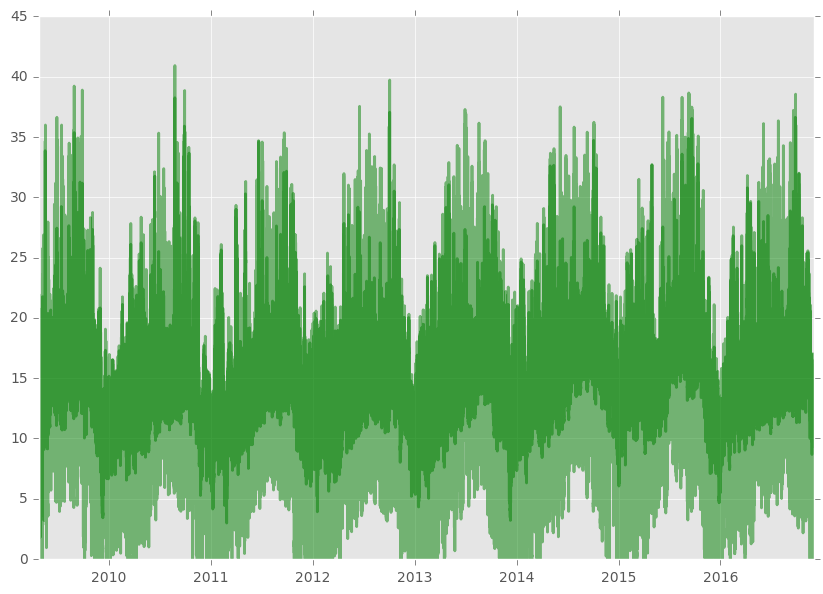

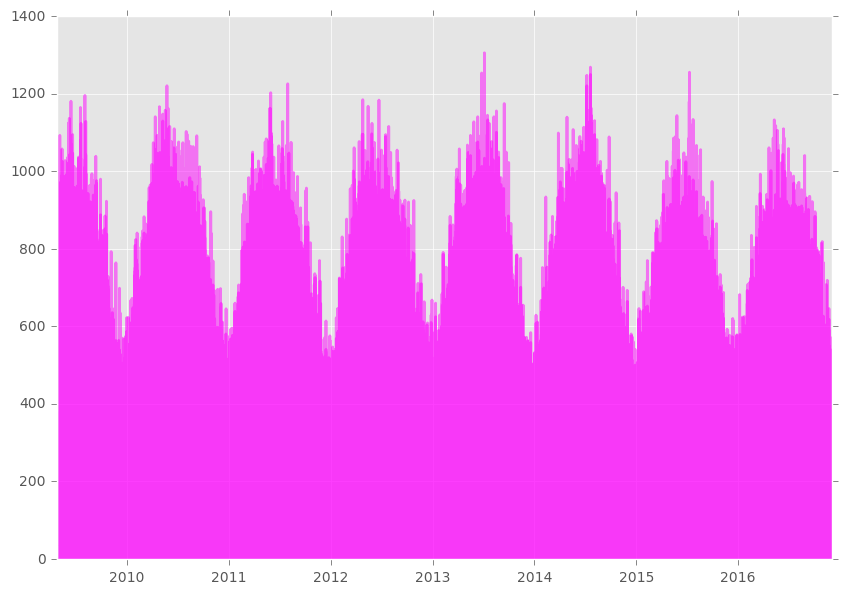

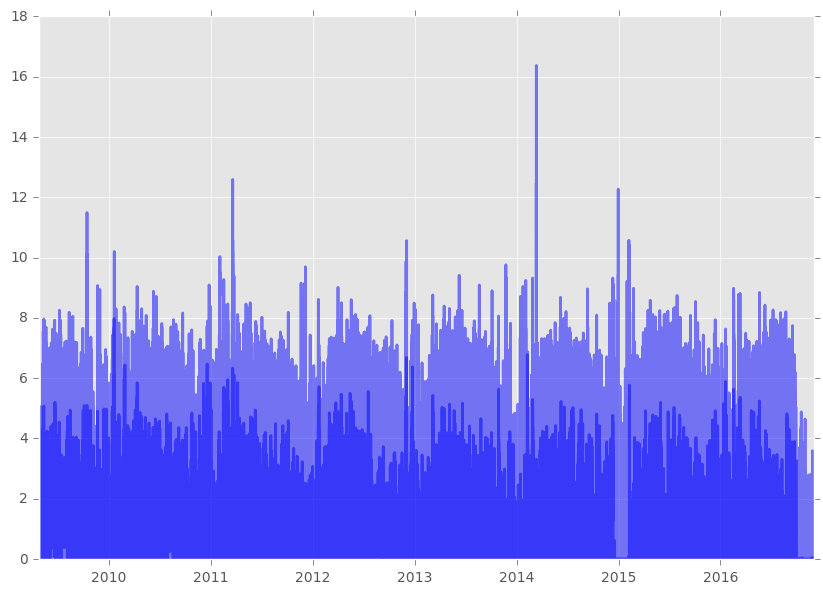

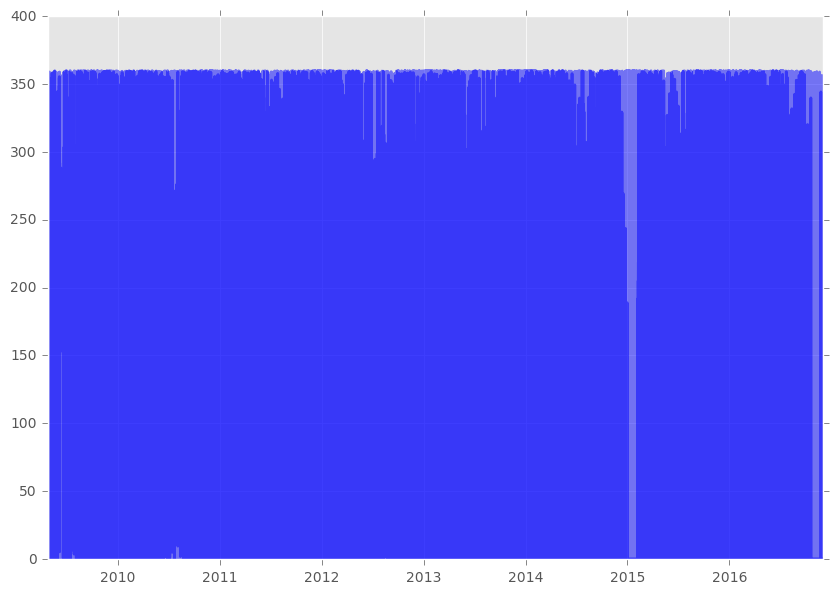

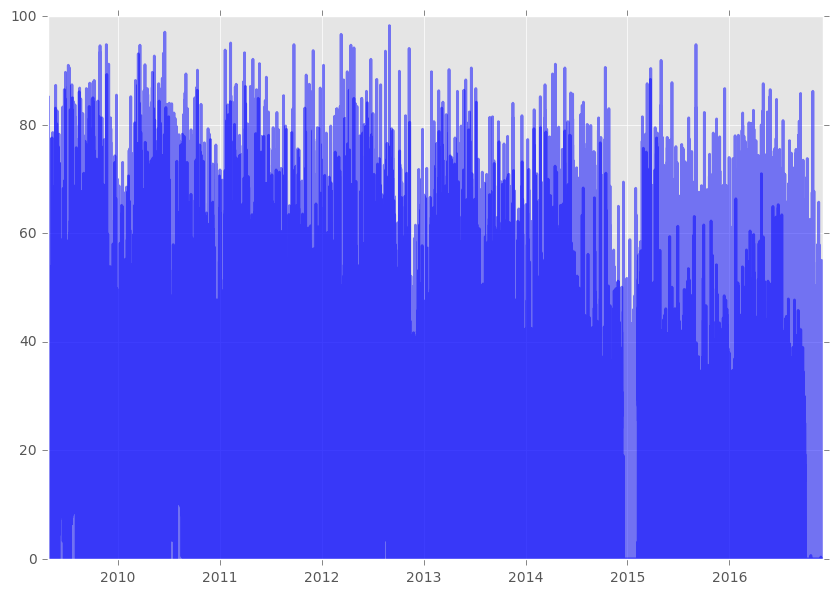

In [5]:
""" Data reading """

colors_dict = {"T [C]":"green", "GHI":"magenta", "wnd v [m/s]":"blue", \
                   "wnd dir [deg]":"blue", "var wnd dir [deg]":"blue"}

for categ in CATEG_LIST[:-1]:
    fig = plt.figure (figsize=(10,7))
    ax = fig.add_subplot(111)
    
    for stn in STATIONS:
        fname = "res/mod/" + stn + ".csv"
        df = pd.read_csv(fname, header=0, \
                         parse_dates={'Date-Time':[0]}, index_col=0)
        slice_df = pd.DataFrame(df.loc[:, :])
        #dp.display (slice_df.head(n=2), slice_df.tail(n=2))
        #print (slice_df.info())
        #print (slice_df.describe())
        ax.plot ( slice_df[categ], color=colors_dict[categ], \
                 linestyle='-', linewidth=2, alpha=0.5)
        if categ == "wnd dir [deg]":   # if "wnd dir", draw variance too
            ax.plot ( df["var wnd dir [deg]"], color=colors_dict["var wnd dir [deg]"], \
                     linestyle='-', linewidth=2, alpha=0.5)

    plt.show()


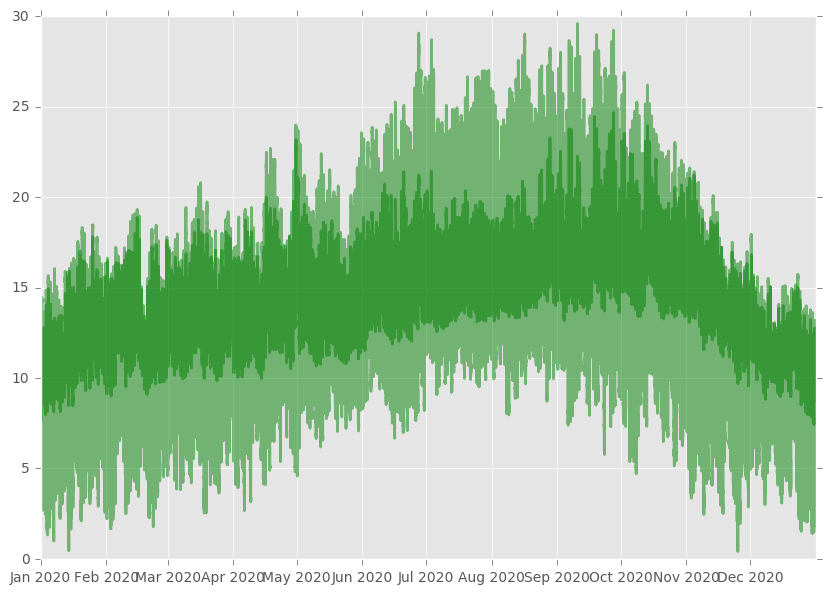

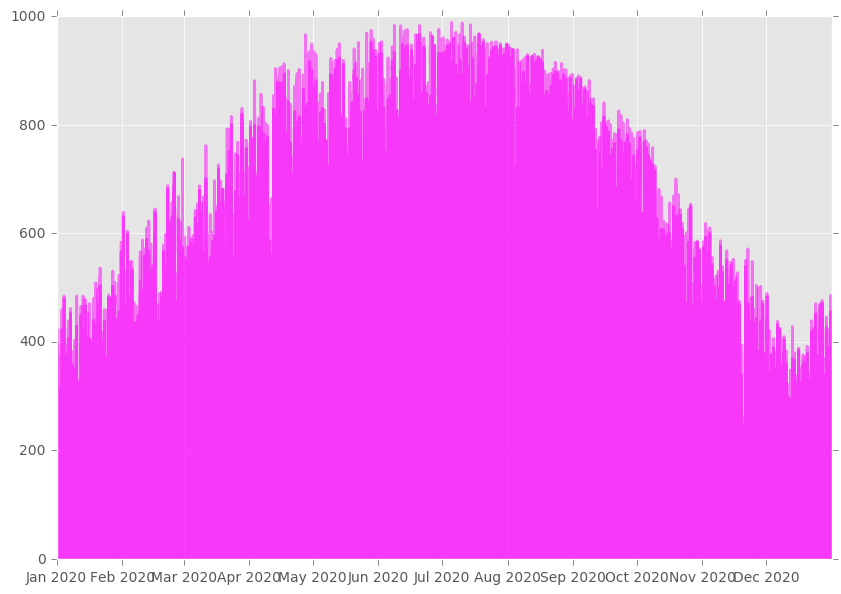

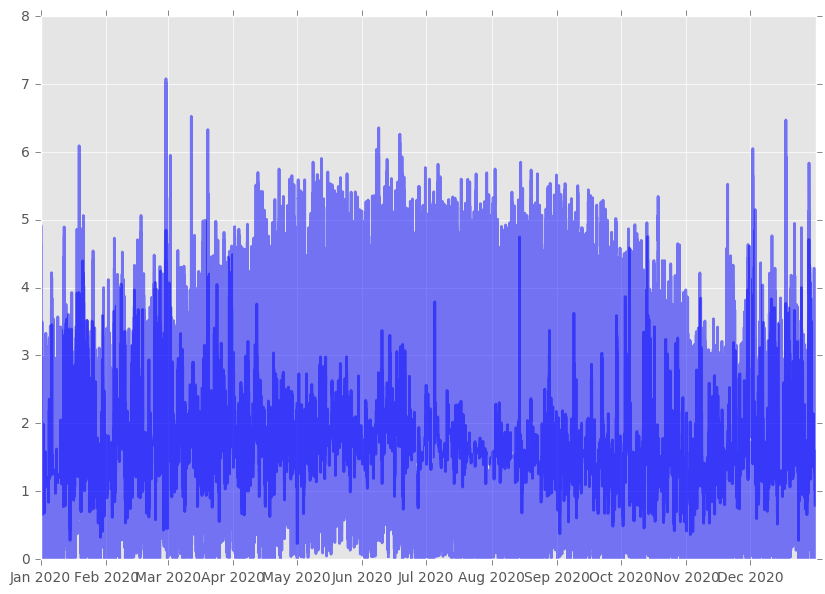

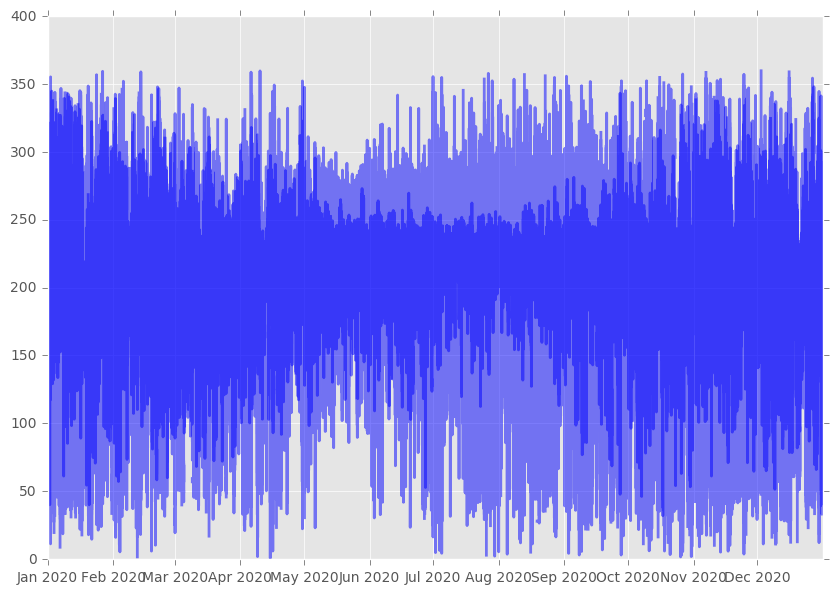

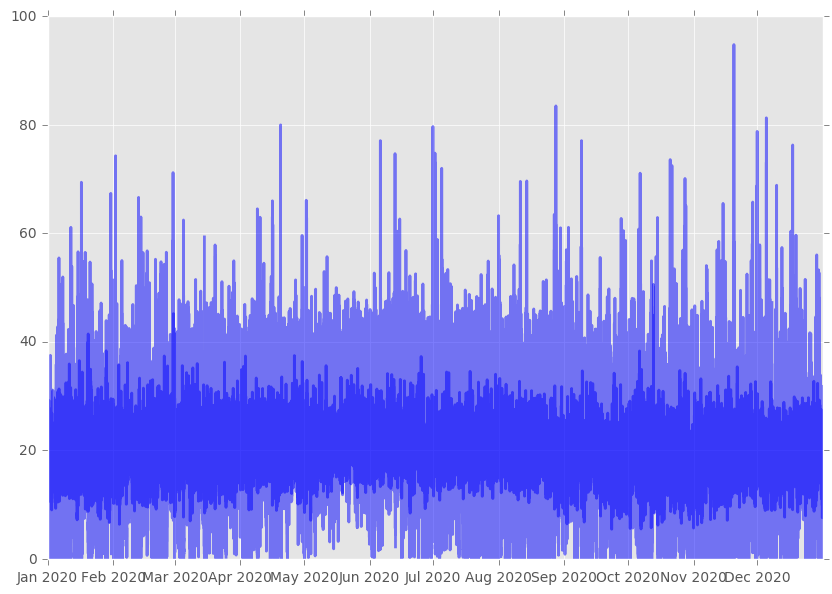

In [6]:
""" Average year """

# dict of dicts for each station to hold all info to be used from here on
alwthr_dct = {key:{} for key in STATIONS}

for stn in STATIONS:
    fname = "res/mod/" + stn + "_wNA.csv"
    alwthr_dct[stn]["all data"] = pd.read_csv(fname, header=0, index_col=0, \
                                              parse_dates={'DateTime':[0]})


# Determine average year for stations' data
for stn in STATIONS:
    alwthr_dct[stn]["avg yr"] = {}
    df = alwthr_dct[stn]["all data"].copy()
    df["dt"] = df.index
    df["dt"] = df["dt"].apply(lambda x: x.replace(year=2020))
    # TODO: above: eliminate yr, forget 2020? If not possible, change type/res ns -> ms, have yr 0, not 2020
    df_ann_grpby = df.groupby([df["dt"]])
    avg_yr_df = df_ann_grpby.mean()
    avg_yr_df.index.name = None
    #dp.display (avg_yr_df)
    alwthr_dct[stn]["avg yr"]["all"] = avg_yr_df


# Now plot the obtained average years' data
for categ in CATEG_LIST[:-1]:
    fig = plt.figure (figsize=(10,7))
    ax = fig.add_subplot(111)
    
    for stn in STATIONS:
        df = alwthr_dct[stn]["avg yr"]["all"][categ]
        #dp.display (df.head(n=2), slice_df.tail(n=2))
        #print (df.info())
        #print (df.describe())
        ax.plot ( df, color=colors_dict[categ], \
                 linestyle='-', linewidth=2, alpha=0.5)
        if categ == "wnd dir [deg]":   # if "wnd dir", draw variance too
            ax.plot ( df["var wnd dir [deg]"], color=colors_dict["var wnd dir [deg]"], \
                     linestyle='-', linewidth=2, alpha=0.5)

    plt.show()



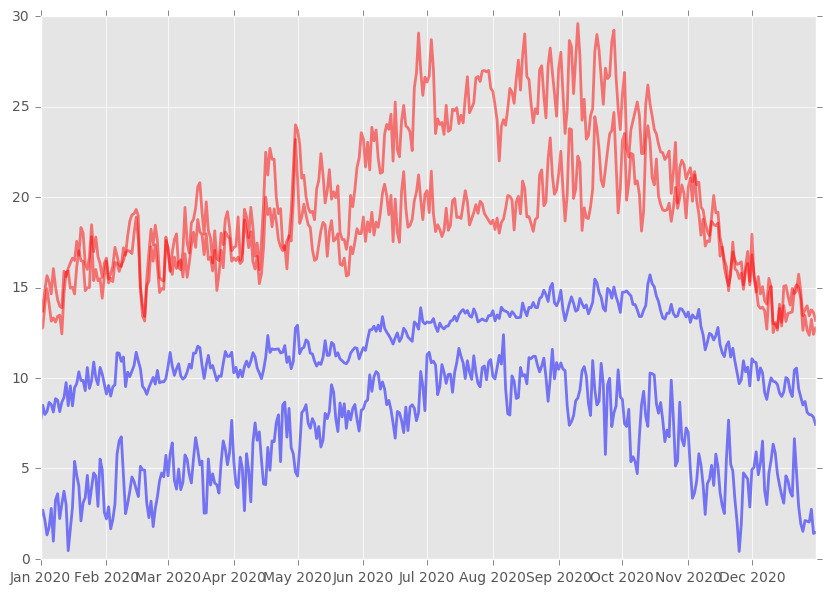

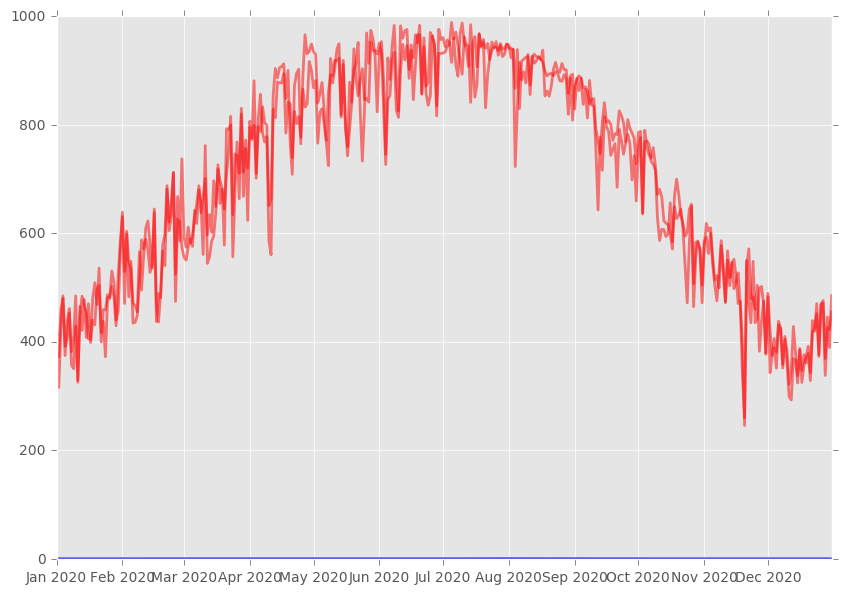

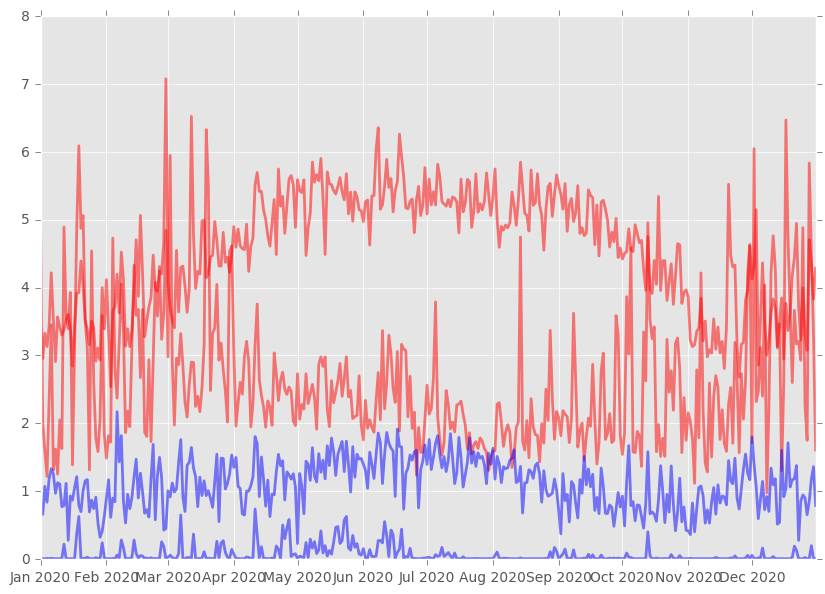

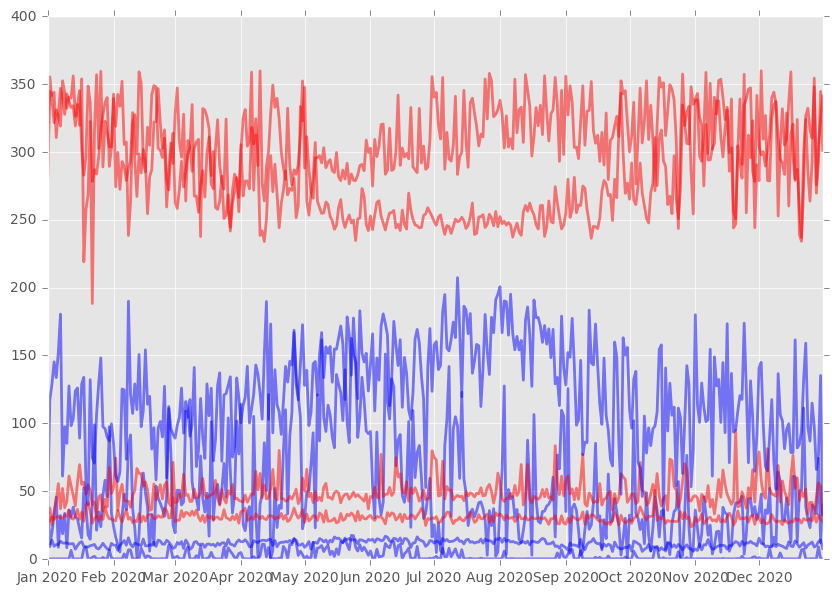

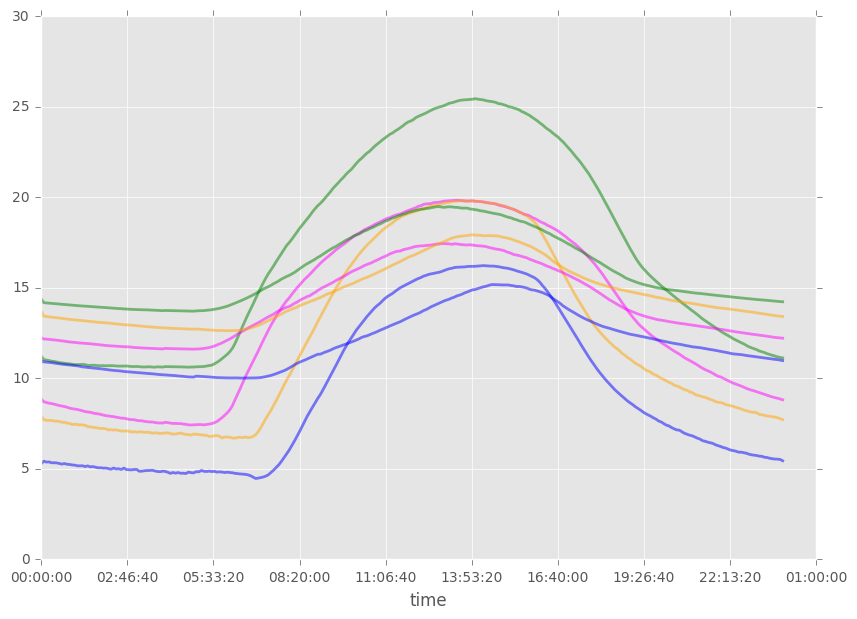

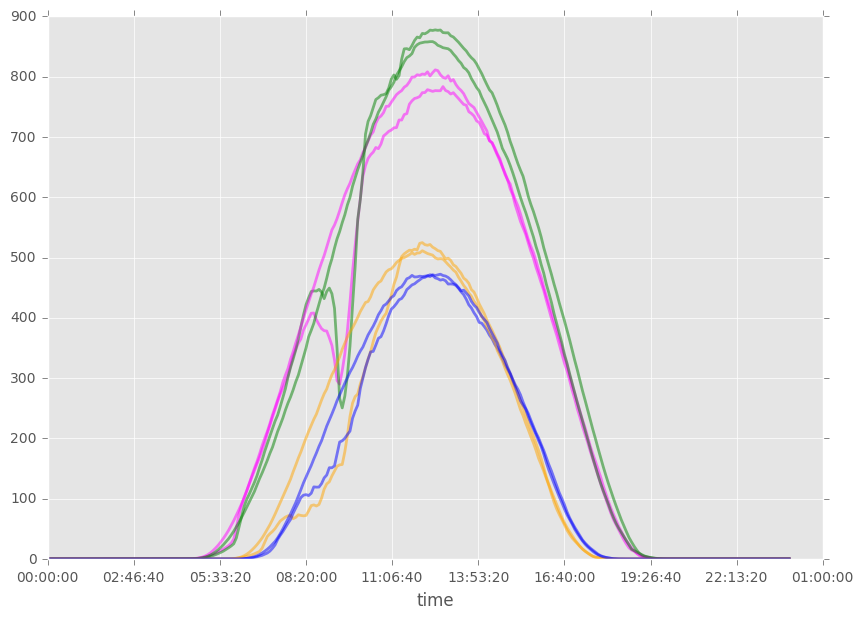

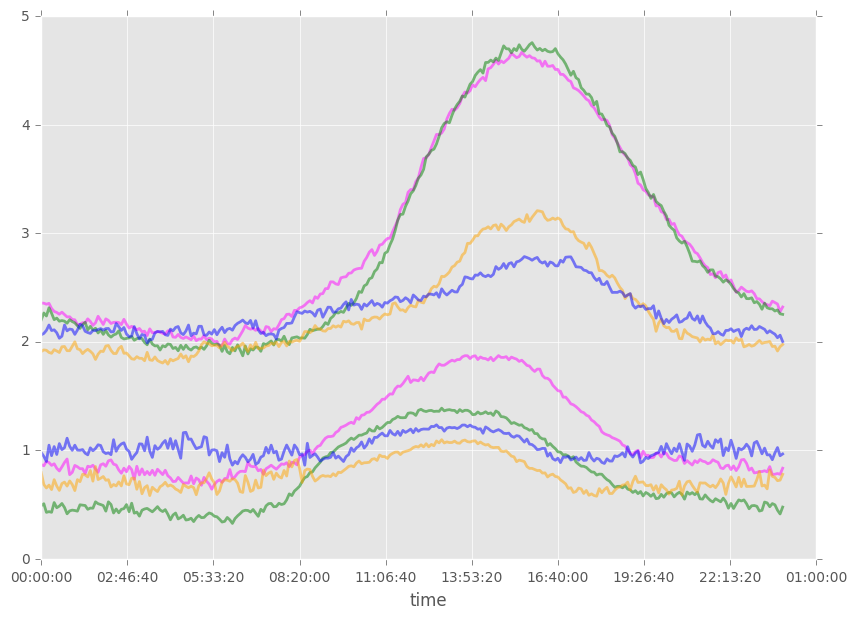

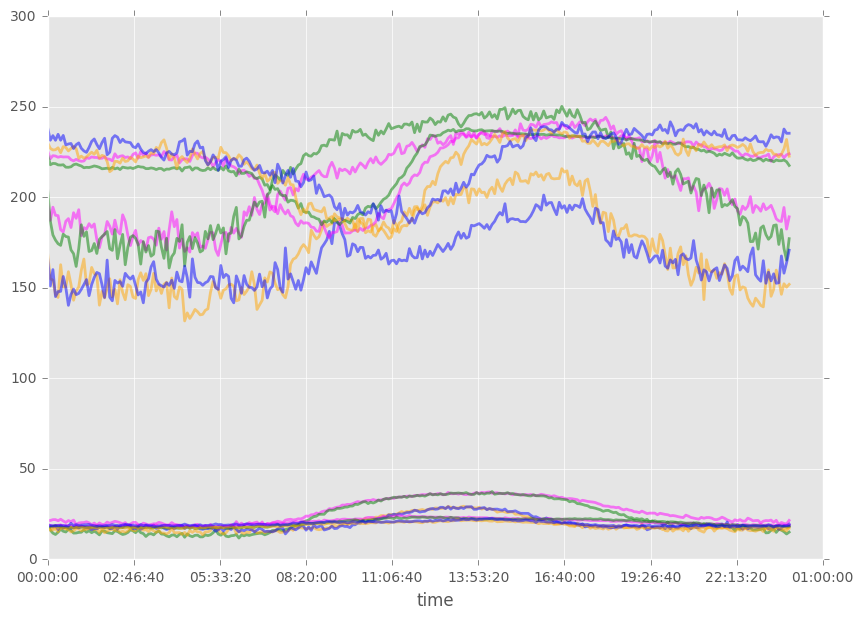

In [11]:
""" Determining average seasonal day and average inter-day trends of average year """
""" Base dict structure
alwthr_dct : station : { "all date" , "avg yr"{"all", "day min", "day max"} , "avg day"=[spr,sum,aut,wnt] } """

for stn in STATIONS:
    
    df_2020 = alwthr_dct[stn]["avg yr"]["all"].copy()
    df_2020["date"] = df_2020.index.date
    df_2020["time"] = df_2020.index.time
    #dp.display (df17_2020)

    # Year trend
    df_2020_day_grpby = df_2020.groupby(df_2020["date"])
    df_2020_min = df_2020_day_grpby.min()
    df_2020_max = df_2020_day_grpby.max()
    df_2020_min.drop(["date", "time"], axis=1, inplace=True)
    df_2020_max.drop(["date", "time"], axis=1, inplace=True)
    df_2020_min.index.name = None
    df_2020_max.index.name = None
    #dp.display (df_2020_min, df_2020_max)
    alwthr_dct[stn]["avg yr"]["day min"] = df_2020_min
    alwthr_dct[stn]["avg yr"]["day max"] = df_2020_max
    # TODO: Plot all 4 obtained dfs on the same graph, so min/max of each of stations 17/18


    # Average day
    seasons = []   # spring, summer, autumn, winter  as in the northern hemisphere
    seasons.append(df_2020.loc[SN_PTS[0]:SN_PTS[1],:])
    seasons.append(df_2020.loc[SN_PTS[1]:SN_PTS[2],:])
    seasons.append(df_2020.loc[SN_PTS[2]:SN_PTS[3],:])
    seasons.append(pd.concat([df_2020.loc[SN_PTS[3]:,:], df_2020.loc[:SN_PTS[0],:]]))

    season_day_avgs = []
    for season in seasons:
        season_day_grpby = season.groupby(df_2020["time"])
        season_day_avg = season_day_grpby.mean()
        season_day_avg.index.name = None   # This line and one above are waste just for name to None
        season_day_avgs.append(season_day_avg)
        #dp.display ( season_day_avgs[ len(season_day_avgs)-1 ] )
    alwthr_dct[stn]["avg day"] = season_day_avgs
    



# Now plot the obtained average years daily min-max trends
min_max_clrs = ['blue', 'red']

for categ in CATEG_LIST[:-1]:
    fig = plt.figure (figsize=(10,7))
    ax = fig.add_subplot(111)
    
    for stn in STATIONS:
        min_df = alwthr_dct[stn]["avg yr"]["day min"]
        max_df = alwthr_dct[stn]["avg yr"]["day max"]
        
        ax.plot ( min_df[categ], color="blue", \
                 linestyle='-', linewidth=2, alpha=0.5)
        ax.plot ( max_df[categ], color="red", \
                 linestyle='-', linewidth=2, alpha=0.5)
        if categ == "wnd dir [deg]":   # if "wnd dir", draw variance too
            ax.plot ( min_df["var wnd dir [deg]"], color="blue", \
                     linestyle='-', linewidth=2, alpha=0.5)
            ax.plot ( max_df["var wnd dir [deg]"], color="red", \
                     linestyle='-', linewidth=2, alpha=0.5)
    plt.show()



print ("\n\n\n")
# Now plot the obtained average seasons' day data
ssn_clrs = ['magenta', 'green', 'orange', 'blue']

for categ in CATEG_LIST[:-1]:
    fig = plt.figure (figsize=(10,7))
    ax = fig.add_subplot(111)
    
    for stn in STATIONS:
        season_dfs = alwthr_dct[stn]["avg day"]
        
        for idx, df in enumerate(season_dfs):
            ax.plot ( df[categ], color=ssn_clrs[idx], \
                     linestyle='-', linewidth=2, alpha=0.5)
            if categ == "wnd dir [deg]":   # if "wnd dir", draw variance too
                ax.plot ( df["var wnd dir [deg]"], color=ssn_clrs[idx], \
                         linestyle='-', linewidth=2, alpha=0.5)
    
    plt.show()



In [12]:
""" TODOs """

# TODO: How can the seasonal averages of wind speed and direction flucctuate so much?!
# TODO: I should determine and show my own variance, like "error". I average
  # entire seosons after having averaged the years. So please show some deviation, variance, ...
# TODO: Plot the daily trends throughout the average year too, the minima and maxima
# Implement this: Dictionary of stations or of season or minimmum maximum. I think dict 1st layer
  # of stations, and in each dicts of e.g. seasons or min/max, or categories of such categorizations
# TODO: Finally do something useful, e.g. correlate with crime
# TODO: Visualize the wind direction differently, e.g. 22.5 degree incremented arrows every so minutes
  # over the wind speed curve (quite like wunderground.com displays it)


# Report:
# - Some kind of artifact in irradiance data of spring and summer (the shadow at ~9.5 am of average
    # season day)





' TODOs '